In [5]:
# (1-check )
# 一開始到訓練階段就會出現 kernel has died ......
# 你不要直接拿這個error code去 google   你要去terninal 看他最原始的error code !!

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [6]:
# import ipykernel_launcher

In [7]:
# (1-1)
import numpy as np
np.random.seed(10)
from keras.datasets import cifar10

(x_train_image, y_train_label), (x_test_image, y_test_label)=cifar10.load_data()

Using TensorFlow backend.


In [32]:
# (1-2) check formal datatype 
# print(x_train_image.shape)
# print(x_test_image.shape)  
# print(y_train_label.shape)
# print(y_test_label.shape)  


# x_train_image＝image_list＿1
# x_test_image＝valid_image_list_1
# y_train_label＝label_list_2
# y_test_label＝valid_label_list_2

print(image_list＿1.shape)
print(valid_image_list_1.shape)
print(label_list_2.shape)
print(valid_label_list_2.shape)


(2700, 29, 43, 3)
(180, 29, 43, 3)
(2700, 1)
(180, 1)


In [ ]:
# check 
# y_test_label

In [33]:
# (2-1)Img資料預處理
# x_train_normalize=x_train_image.astype('float32')/255.0
# x_test_normalize=x_test_image.astype('float32')/255.0  
# print(x_train_normalize.shape)     #original:(50000, 32, 32, 3)
# print(x_test_normalize.shape)      #original:(10000, 32, 32, 3)


x_train_normalize=image_list＿1.astype('float32')/255.0
x_test_normalize=valid_image_list_1.astype('float32')/255.0  
print(x_train_normalize.shape)     #original:(50000, 32, 32, 3)
print(x_test_normalize.shape)      #original:(10000, 32, 32, 3)  

(2700, 29, 43, 3)
(180, 29, 43, 3)


In [34]:
# (2-2)label資料預處理
# from keras.utils import np_utils
# y_train_onehot=np_utils.to_categorical(y_train_label)
# y_test_onehot=np_utils.to_categorical(y_test_label)


from keras.utils import np_utils
y_train_onehot=np_utils.to_categorical(label_list_2)
y_test_onehot=np_utils.to_categorical(valid_label_list_2)

In [35]:
from keras.models import Sequential  
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D  
from keras.layers import ZeroPadding2D,Activation  

In [16]:
# tip 
#Sequential?     # 如何看函數的功用 shift +tab *2

In [36]:
# (3-1)  建立cnn model
model=Sequential()
model.add(Conv2D(filters=32,                #人類自定
                 kernel_size=(3,3),         #人類自定 視圖片大小而定
                 padding='same',            # convolution 後像素會變小 此時可以在外圍補0
                 input_shape=(29,43,3),     #old:input_shape=(32,32,3)
                 activation='relu'))
model.add(Dropout(0.25))                    #為了避免overfitting 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 padding='same',
                 activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
#建立分類模型 MLP
model.add(Flatten())
# model.add(Dropout(0.25))
model.add(Dense(1024,activation='relu'))
# model.add(Dropout(0.25))
model.add(Dense(3,activation='softmax'))      # 最後輸出label 有幾個就要寫多少
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 29, 43, 32)        896       
_________________________________________________________________
dropout_3 (Dropout)          (None, 29, 43, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 21, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 21, 64)        18496     
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 21, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 10, 64)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4480)              0         
__________

In [37]:
# (3-2)  計算loss
# 有的時候一模一樣的code 就是第二次執行才會成功
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

train_history=model.fit(x=x_train_normalize, y=y_train_onehot, validation_split=0.2, epochs=10, batch_size=20,verbose=2)

Train on 2160 samples, validate on 540 samples
Epoch 1/10
 - 35s - loss: 0.0659 - acc: 0.9778 - val_loss: 9.2824e-05 - val_acc: 1.0000
Epoch 2/10
 - 33s - loss: 2.2056e-07 - acc: 1.0000 - val_loss: 4.8979e-05 - val_acc: 1.0000
Epoch 3/10
 - 47s - loss: 1.2498e-07 - acc: 1.0000 - val_loss: 3.7297e-05 - val_acc: 1.0000
Epoch 4/10
 - 42s - loss: 1.1949e-07 - acc: 1.0000 - val_loss: 3.4958e-05 - val_acc: 1.0000
Epoch 5/10
 - 42s - loss: 1.1929e-07 - acc: 1.0000 - val_loss: 3.1647e-05 - val_acc: 1.0000
Epoch 6/10
 - 39s - loss: 1.1932e-07 - acc: 1.0000 - val_loss: 3.0987e-05 - val_acc: 1.0000
Epoch 7/10
 - 39s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.9270e-05 - val_acc: 1.0000
Epoch 8/10
 - 43s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.9298e-05 - val_acc: 1.0000
Epoch 9/10
 - 47s - loss: 1.1924e-07 - acc: 1.0000 - val_loss: 2.8699e-05 - val_acc: 1.0000
Epoch 10/10
 - 45s - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 2.8180e-05 - val_acc: 1.0000


In [ ]:
# tip 
# 這裡通常會卡住

In [38]:

    def show_train_history(train_history):
     fig=plt.gcf()
     fig.set_size_inches(16, 6)
     plt.subplot(121)
     plt.plot(train_history.history["acc"])
     plt.plot(train_history.history["val_acc"])
     plt.title("Train History")
     plt.xlabel("Epoch")
     plt.ylabel("Accuracy")
     plt.legend(["train", "validation"], loc="upper left")
     plt.subplot(122)
     plt.plot(train_history.history["loss"])
     plt.plot(train_history.history["val_loss"])
     plt.title("Train History")
     plt.xlabel("Epoch")
     plt.ylabel("Loss")
     plt.legend(["train", "validation"], loc="upper left")
     plt.show()

In [39]:
import matplotlib.pyplot as plt  

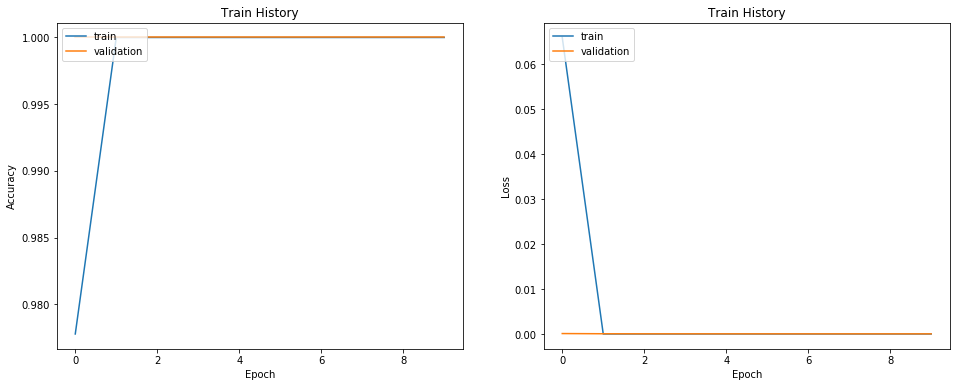

In [40]:
show_train_history(train_history)

In [41]:
scores=model.evaluate(x_test_normalize, y_test_onehot)

180/180 [==============================] - 0s 1ms/step


In [42]:
print("Accuracy=", scores)

Accuracy= [2.979868044753352e-05, 1.0]


In [43]:
prediction=model.predict_classes(x_test_normalize)  

In [46]:
print(prediction[:10])  
print(valid_label_list_2[:10]) 

[2 0 2 1 2 2 1 0 2 2]
[[2]
 [0]
 [2]
 [1]
 [2]
 [2]
 [1]
 [0]
 [2]
 [2]]


In [ ]:
show_train_history(train_history)

In [ ]:
# prepare data 

In [16]:
# (0)
#formal
import os
import random as r
import numpy as np

# def get_File(file_dir):

# The images in each subfolder
images = []
    
# The subfolders
subfolders = []
 
# Using "os.walk" function to grab all the files in each folder
for dirPath, dirNames, fileNames in os.walk('/Users/elisachang/test_create_pic/'):
    
    names = []
    for name in fileNames:
        names.append(os.path.join(dirPath, name))

    for name in dirNames:
        subfolders.append(os.path.join(dirPath, name))
        
    # 隨機打亂各個資料夾內的數據
    r.shuffle(names)
    if names != []:
        images.append(names)
         
# 計算最小檔案數量的資料夾
mincount = float("Inf")
for num_folder in subfolders:
    n_img = len(os.listdir(num_folder))
        
    if n_img < mincount:
        mincount = n_img
    
    # 只保留最小檔案數量
for i in range(len(images)):
    images[i] = images[i][0:mincount]
    
images = np.reshape(images, [mincount*len(subfolders), ])      #cannot reshape array of size 4 into shape (2700,)  你需要把test_create_pic多出來的檔案刪掉
    
# To record the labels of the image dataset
labels = []
for count in range(len(subfolders)):
    labels = np.append(labels, mincount * [count])
    
# 打亂最後輸出的順序，去除每個類別間的隔閡
subfolders = np.array([images, labels])
subfolders = subfolders[:, np.random.permutation(subfolders.shape[1])].T
    
image_list = list(subfolders[:, 0])
label_list = list(subfolders[:, 1])
label_list = [int(float(i)) for i in label_list]
print( image_list, label_list)
# return image_list, label_list

#太好了  真的有打亂label 到底對結果有無影響呢？

['/Users/elisachang/test_create_pic/test_003/triangle_001_111.jpg', '/Users/elisachang/test_create_pic/test_001/circle_002_84.jpg', '/Users/elisachang/test_create_pic/test_003/triangle_001_182.jpg', '/Users/elisachang/test_create_pic/test_002/square_003_117.jpg', '/Users/elisachang/test_create_pic/test_003/triangle_003_187.jpg', '/Users/elisachang/test_create_pic/test_003/triangle_002_109.jpg', '/Users/elisachang/test_create_pic/test_002/square_002_42.jpg', '/Users/elisachang/test_create_pic/test_001/circle_001_55.jpg', '/Users/elisachang/test_create_pic/test_003/triangle_001_181.jpg', '/Users/elisachang/test_create_pic/test_003/triangle_002_60.jpg', '/Users/elisachang/test_create_pic/test_002/square_001_277.jpg', '/Users/elisachang/test_create_pic/test_002/square_003_268.jpg', '/Users/elisachang/test_create_pic/test_001/circle_003_266.jpg', '/Users/elisachang/test_create_pic/test_001/circle_002_3.jpg', '/Users/elisachang/test_create_pic/test_001/circle_002_118.jpg', '/Users/elisachang

In [17]:
# check 
# o:circle 1:square  2: triangle 
from PIL import *
from PIL import Image         # 在其他ipynb 

print(label_list[:10])         # [0, 2, 0, 2, 2]

position=1
x=image_list[position]
# label_list

img = Image.open(x) # 读取的图像显示的<matplotlib.image.AxesImage object at 0x7f9f0c60f7f0>
img.show()

print(label_list[position])

[2, 0, 2, 1, 2, 2, 1, 0, 2, 2]
0


In [19]:
# test_create_pic 有900
# vaild_create_pic 有180

len(label_list[:10])    #10
len(image_list[:10])    #10

valid_label_list=label_list[:180]
valid_image_list=image_list[:180]


len(valid_label_list)
# valid_image_list

180

In [30]:
# 創建出final image
small_imgs = [Image.open(f).resize((43, 29)) for f in image_list]
image_list＿1 = np.array([np.array(img) for img in small_imgs])

image_list＿1.shape    

(2700, 29, 43, 3)

In [21]:
small_imgs = [Image.open(f).resize((43, 29)) for f in valid_image_list]
valid_image_list_1 = np.array([np.array(img) for img in small_imgs])

valid_image_list_1.shape         #(180, 29, 43, 3)

(180, 29, 43, 3)

In [22]:
# 創建出final label 

label_list_1=np.asarray(label_list)
label_list_2=label_list_1.reshape((len(label_list_1),1))
print(label_list_2)

[[2]
 [0]
 [2]
 ...
 [1]
 [2]
 [0]]


In [23]:
valid_label_list_1=np.asarray(valid_label_list)
valid_label_list_2=valid_label_list_1.reshape((len(valid_label_list),1))
print(valid_label_list_2)

[[2]
 [0]
 [2]
 [1]
 [2]
 [2]
 [1]
 [0]
 [2]
 [2]
 [1]
 [1]
 [0]
 [0]
 [0]
 [2]
 [2]
 [0]
 [0]
 [1]
 [0]
 [2]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [2]
 [2]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [2]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [2]
 [1]
 [0]
 [1]
 [2]
 [1]
 [2]
 [1]
 [2]
 [1]
 [1]
 [1]
 [1]
 [2]
 [1]
 [0]
 [0]
 [2]
 [0]
 [2]
 [1]
 [0]
 [0]
 [2]
 [1]
 [2]
 [1]
 [2]
 [2]
 [0]
 [2]
 [2]
 [1]
 [1]
 [2]
 [2]
 [2]
 [1]
 [0]
 [2]
 [2]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [2]
 [2]
 [0]
 [0]
 [0]
 [1]
 [1]
 [2]
 [1]
 [1]
 [1]
 [2]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [2]
 [0]
 [2]
 [2]
 [2]
 [2]
 [0]
 [0]
 [0]
 [1]
 [0]
 [2]
 [2]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [2]
 [2]
 [0]
 [0]
 [2]
 [1]
 [1]
 [0]
 [0]
 [1]
 [2]
 [0]
 [2]
 [1]
 [0]
 [0]
 [1]
 [2]
 [0]
 [1]
 [0]
 [2]
 [0]
 [2]
 [1]
 [2]
 [2]
 [1]
 [0]
 [2]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [2]
 [2]
 [2]
 [2]
 [1]
 [0]
 [1]
 [1]]


In [ ]:
image_list＿1
valid_image_list_1
valid_label_list_2
label_list_2